In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = "./datasets"

In [3]:
def load_housing_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing_dataset = load_housing_data()

In [5]:
housing_dataset.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
prices = housing_dataset['MEDV']
features = housing_dataset.drop('MEDV', axis = 1)

In [7]:
print("housing_dataset shape : ",housing_dataset.shape)
print("X shape : ",prices.shape)
print("Y shape : ",features.shape)

housing_dataset shape :  (489, 4)
X shape :  (489,)
Y shape :  (489, 3)


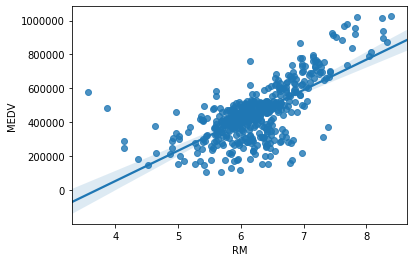

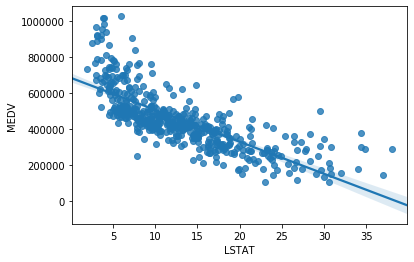

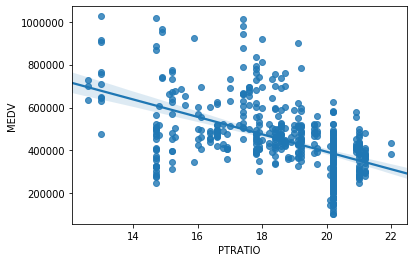

In [8]:
for var in ['RM', 'LSTAT', 'PTRATIO']:
    sns.regplot(housing_dataset[var], prices)
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=1)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the Linear Regression Algorithm to the Training Set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
Y_pred = regressor.predict(X_test)

In [13]:
# Calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

89720.22368141904


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(features, prices, test_size=0.2, random_state=1)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

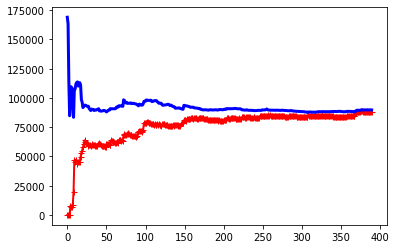

In [16]:
regressor = LinearRegression()
plot_learning_curves(regressor, features,prices)

# Fitting the Stochastic Gradient Descent Regression Algorithm to the Training Set

In [17]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(n_iter_no_change=50, penalty=None, eta0=0.1)
regressor.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=50, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [18]:
Y_pred = regressor.predict(X_test)

In [19]:
# Calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

91881.9165843404


# Fitting the ElasticNet Regression Algorithm to the Training Set

In [20]:
from sklearn.linear_model import ElasticNet
regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)
regressor.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
Y_pred = regressor.predict(X_test)

In [22]:
# Calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

90016.07077722924


# Fitting the Linear Support Vector Regression Algorithm to the Training Set

In [23]:
from sklearn.svm import LinearSVR
regressor = LinearSVR(epsilon=1.5)
regressor.fit(X_train,y_train)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [24]:
Y_pred = regressor.predict(X_test)

In [25]:
# Calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

477489.78799356834


# Fitting the Epsilon-Support Vector Regression Algorithm to the Training Set

In [26]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
Y_pred = regressor.predict(X_test)

In [28]:
# Calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

477489.78799356834


# Fitting the Decision Tree Regression Algorithm to the Training Set

In [29]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [30]:
from sklearn.model_selection import ShuffleSplit
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

In [31]:
# Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """   
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    # Return the score
    return score

In [32]:
params = {'max_depth': range(1,11)}
from sklearn.metrics import make_scorer
scoring_fnc = make_scorer(performance_metric)

In [33]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

In [34]:
# Fit the grid search object to the data to compute the optimal model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 11)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

In [35]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
regressor = DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [37]:
Y_pred = regressor.predict(X_test)

In [38]:
# Calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

75978.00031490349


# Fitting the Random Forest Regression Algorithm to the Training Set

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [40]:
Y_pred = regressor.predict(X_test)

In [41]:
Y_pred.shape

(98,)

In [42]:
y_test.shape

(98,)

In [43]:
# Calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

67400.80711682909


# Fitting Deep Learning Model(ANN) Regression

In [44]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
tf.keras.backend.clear_session() 

In [45]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import activations

In [46]:
def build_model():
    inputs = keras.Input(shape=(3,))
    dense = layers.Dense(4, activation=activations.relu)
    x = dense(inputs)
    x = layers.Dense(8 , activation=activations.relu)(x)
    x = layers.Dense(16 , activation=activations.relu)(x)
    x = layers.Dense(16 , activation=activations.relu)(x)
    x = layers.Dense(8 , activation=activations.relu)(x)
    x = layers.Dense(4 , activation=activations.relu)(x)
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)   
    return model

In [47]:
model = build_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dens

In [48]:
# from keras import backend
# def rmse(y_true, y_pred):
#     return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [49]:
# model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, batch_size=64, epochs=500, validation_split=0.3, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 273 samples, validate on 118 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
 - 0s - loss: 238411557306.6081 - mean_absolute_error: 459838.4375 - val_loss: 227282499688.1356 - val_mean_absolute_error: 446499.1250
Epoch 2/500
 - 0s - loss: 238411494891.3700 - mean_absolute_error: 459838.3750 - val_loss: 227282447481.4915 - val_mean_absolute_error: 446499.0625
Epoch 3/500
 - 0s - loss: 238411463983.8242 - mean_absolute_error: 459838.3438 - val_loss: 227282418878.9153 - val_mean_absolute_error: 446498.9688
Epoch 4/500
 - 0s - loss: 238411421073.3480 - mean_absolute_error: 459838.3438 - val_loss: 227282374725.4237 - val_mean_absolute_error: 446498.9062
Epoch 5/500
 - 0s - loss: 238411372881.5824 - mean_absolute_error: 459838.2188 - val_loss: 227282324184.9492 - val_mean_absolute_error: 446498.8438
Epoch 6/500
 - 0s - loss: 238411312086.7399 - mean_absolute_error: 459838.1875 - val_loss: 227282256705.0847 - val_mea

Epoch 52/500
 - 0s - loss: 238337028651.1355 - mean_absolute_error: 459761.5625 - val_loss: 227204857856.0000 - val_mean_absolute_error: 446414.9688
Epoch 53/500
 - 0s - loss: 238330436581.7436 - mean_absolute_error: 459754.9375 - val_loss: 227198171517.8305 - val_mean_absolute_error: 446407.8438
Epoch 54/500
 - 0s - loss: 238323462339.0476 - mean_absolute_error: 459747.7812 - val_loss: 227190846203.6610 - val_mean_absolute_error: 446400.0312
Epoch 55/500
 - 0s - loss: 238315869285.2747 - mean_absolute_error: 459740.0312 - val_loss: 227183186822.5085 - val_mean_absolute_error: 446391.8750
Epoch 56/500
 - 0s - loss: 238307813698.5787 - mean_absolute_error: 459731.9375 - val_loss: 227174709629.8305 - val_mean_absolute_error: 446382.8750
Epoch 57/500
 - 0s - loss: 238299058581.0989 - mean_absolute_error: 459722.9375 - val_loss: 227165779794.4407 - val_mean_absolute_error: 446373.3438
Epoch 58/500
 - 0s - loss: 238289744007.0330 - mean_absolute_error: 459713.5938 - val_loss: 227155914404.8

Epoch 107/500
 - 0s - loss: 235758467079.5018 - mean_absolute_error: 457215.2812 - val_loss: 224569209040.2712 - val_mean_absolute_error: 443702.8750
Epoch 108/500
 - 0s - loss: 235619999353.9048 - mean_absolute_error: 457079.3125 - val_loss: 224430055840.5424 - val_mean_absolute_error: 443561.3125
Epoch 109/500
 - 0s - loss: 235478507970.1099 - mean_absolute_error: 456938.9688 - val_loss: 224289697167.1864 - val_mean_absolute_error: 443417.7500
Epoch 110/500
 - 0s - loss: 235334428094.3590 - mean_absolute_error: 456797.6562 - val_loss: 224147960293.9661 - val_mean_absolute_error: 443272.4688
Epoch 111/500
 - 0s - loss: 235188627538.5201 - mean_absolute_error: 456652.8750 - val_loss: 223995704892.7458 - val_mean_absolute_error: 443116.6875
Epoch 112/500
 - 0s - loss: 235029653046.3883 - mean_absolute_error: 456500.5625 - val_loss: 223820414698.3051 - val_mean_absolute_error: 442938.6250
Epoch 113/500
 - 0s - loss: 234852812552.4395 - mean_absolute_error: 456328.1562 - val_loss: 2236432

Epoch 162/500
 - 0s - loss: 212526776019.9268 - mean_absolute_error: 434102.1875 - val_loss: 201069744475.1187 - val_mean_absolute_error: 419342.0938
Epoch 163/500
 - 0s - loss: 211658900596.2784 - mean_absolute_error: 433213.7188 - val_loss: 200200759330.7119 - val_mean_absolute_error: 418417.5000
Epoch 164/500
 - 0s - loss: 210752448474.4908 - mean_absolute_error: 432308.1875 - val_loss: 199185651399.5932 - val_mean_absolute_error: 417340.1250
Epoch 165/500
 - 0s - loss: 209741371489.5238 - mean_absolute_error: 431264.6875 - val_loss: 198246618823.5932 - val_mean_absolute_error: 416335.6562
Epoch 166/500
 - 0s - loss: 208780890096.9963 - mean_absolute_error: 430287.4375 - val_loss: 197254719245.0169 - val_mean_absolute_error: 415273.1562
Epoch 167/500
 - 0s - loss: 207772726763.3700 - mean_absolute_error: 429240.8438 - val_loss: 196269887835.1187 - val_mean_absolute_error: 414213.1250
Epoch 168/500
 - 0s - loss: 206767430089.6117 - mean_absolute_error: 428197.2812 - val_loss: 1951945

Epoch 217/500
 - 0s - loss: 116978054665.3773 - mean_absolute_error: 321935.7188 - val_loss: 106568197345.6271 - val_mean_absolute_error: 302216.5312
Epoch 218/500
 - 0s - loss: 114403526258.4029 - mean_absolute_error: 318376.9375 - val_loss: 103933046298.0339 - val_mean_absolute_error: 298324.0625
Epoch 219/500
 - 0s - loss: 111681218702.5348 - mean_absolute_error: 314527.5625 - val_loss: 101276175064.9492 - val_mean_absolute_error: 294339.5938
Epoch 220/500
 - 0s - loss: 108912548777.7289 - mean_absolute_error: 310608.4375 - val_loss: 98765213487.7288 - val_mean_absolute_error: 290482.6250
Epoch 221/500
 - 0s - loss: 106277769411.0476 - mean_absolute_error: 306832.0938 - val_loss: 96215590391.3220 - val_mean_absolute_error: 286519.3438
Epoch 222/500
 - 0s - loss: 103592100050.0513 - mean_absolute_error: 302967.9688 - val_loss: 93652148918.2373 - val_mean_absolute_error: 282459.2812
Epoch 223/500
 - 0s - loss: 100886520378.1392 - mean_absolute_error: 299047.1562 - val_loss: 9104388693

Epoch 273/500
 - 0s - loss: 15475430163.6923 - mean_absolute_error: 100046.5781 - val_loss: 20579086336.0000 - val_mean_absolute_error: 112873.3594
Epoch 274/500
 - 0s - loss: 15293547358.7106 - mean_absolute_error: 99255.8828 - val_loss: 20319726470.5085 - val_mean_absolute_error: 112153.0703
Epoch 275/500
 - 0s - loss: 15114588535.0916 - mean_absolute_error: 98698.5234 - val_loss: 20234972489.7627 - val_mean_absolute_error: 111635.7422
Epoch 276/500
 - 0s - loss: 14953045115.7802 - mean_absolute_error: 97821.3750 - val_loss: 19985410013.2881 - val_mean_absolute_error: 110985.3906
Epoch 277/500
 - 0s - loss: 14818798306.9304 - mean_absolute_error: 97449.6172 - val_loss: 20064612213.1525 - val_mean_absolute_error: 110625.6406
Epoch 278/500
 - 0s - loss: 14656799076.3370 - mean_absolute_error: 96538.0625 - val_loss: 19949780853.1525 - val_mean_absolute_error: 110040.8281
Epoch 279/500
 - 0s - loss: 14484998594.1099 - mean_absolute_error: 95733.0781 - val_loss: 19734027697.8983 - val_mea

Epoch 330/500
 - 0s - loss: 9081214150.7985 - mean_absolute_error: 70865.6797 - val_loss: 13750277362.9831 - val_mean_absolute_error: 82292.4688
Epoch 331/500
 - 0s - loss: 9005029852.3663 - mean_absolute_error: 70339.0625 - val_loss: 13584829925.9661 - val_mean_absolute_error: 81794.7266
Epoch 332/500
 - 0s - loss: 8930335145.7289 - mean_absolute_error: 70124.2188 - val_loss: 13695312739.7966 - val_mean_absolute_error: 81598.8125
Epoch 333/500
 - 0s - loss: 8872968645.8608 - mean_absolute_error: 69593.6875 - val_loss: 13654156114.4407 - val_mean_absolute_error: 81282.0156
Epoch 334/500
 - 0s - loss: 8802791474.6374 - mean_absolute_error: 69212.4609 - val_loss: 13558081362.4407 - val_mean_absolute_error: 80878.2109
Epoch 335/500
 - 0s - loss: 8734749352.7912 - mean_absolute_error: 68805.3438 - val_loss: 13332306683.6610 - val_mean_absolute_error: 80252.5859
Epoch 336/500
 - 0s - loss: 8663592457.3773 - mean_absolute_error: 68601.7031 - val_loss: 12991870142.9153 - val_mean_absolute_err

Epoch 387/500
 - 0s - loss: 6462247553.4066 - mean_absolute_error: 58578.4609 - val_loss: 8962524437.6949 - val_mean_absolute_error: 67645.0703
Epoch 388/500
 - 0s - loss: 6444720210.5201 - mean_absolute_error: 58448.4062 - val_loss: 8857852928.0000 - val_mean_absolute_error: 67535.1641
Epoch 389/500
 - 0s - loss: 6435977337.9048 - mean_absolute_error: 58258.6758 - val_loss: 8803142204.7458 - val_mean_absolute_error: 67407.0156
Epoch 390/500
 - 0s - loss: 6398377068.7766 - mean_absolute_error: 57985.4414 - val_loss: 8906793775.7288 - val_mean_absolute_error: 67503.8281
Epoch 391/500
 - 0s - loss: 6359430031.4725 - mean_absolute_error: 58282.7070 - val_loss: 8762488753.8983 - val_mean_absolute_error: 67230.1328
Epoch 392/500
 - 0s - loss: 6339927043.7509 - mean_absolute_error: 58031.4414 - val_loss: 8650160431.7288 - val_mean_absolute_error: 67045.1797
Epoch 393/500
 - 0s - loss: 6322995730.7546 - mean_absolute_error: 57747.0078 - val_loss: 8665143530.3051 - val_mean_absolute_error: 670

Epoch 444/500
 - 0s - loss: 5598366072.9670 - mean_absolute_error: 54697.5977 - val_loss: 7045074084.8814 - val_mean_absolute_error: 63939.9375
Epoch 445/500
 - 0s - loss: 5589714127.2381 - mean_absolute_error: 54826.2734 - val_loss: 6956209256.1356 - val_mean_absolute_error: 63651.7344
Epoch 446/500
 - 0s - loss: 5568763994.0220 - mean_absolute_error: 54625.3281 - val_loss: 7004885417.2203 - val_mean_absolute_error: 63810.0469
Epoch 447/500
 - 0s - loss: 5568607652.1026 - mean_absolute_error: 54773.1133 - val_loss: 6981531925.6949 - val_mean_absolute_error: 63737.1719
Epoch 448/500
 - 0s - loss: 5559568012.6593 - mean_absolute_error: 54710.7500 - val_loss: 6862452866.1695 - val_mean_absolute_error: 63341.5156
Epoch 449/500
 - 0s - loss: 5577270939.6630 - mean_absolute_error: 54755.9844 - val_loss: 6941551216.8136 - val_mean_absolute_error: 63636.1914
Epoch 450/500
 - 0s - loss: 5538574150.3297 - mean_absolute_error: 54558.6172 - val_loss: 6913037581.0169 - val_mean_absolute_error: 635

In [50]:
mae_history = history.history['val_mean_absolute_error']

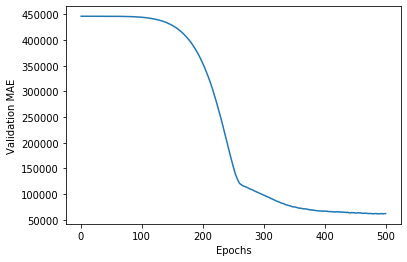

In [51]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

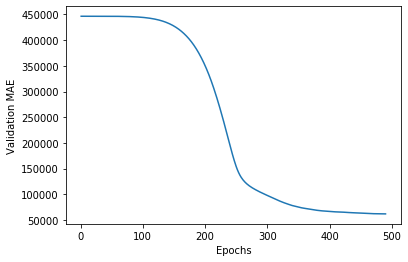

In [52]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [53]:
Y_pred = model.predict(X_test, batch_size=64)

In [54]:
my_list = map(lambda x : x[0], Y_pred)
Y_pred = pd.Series(my_list)

In [55]:
Y_pred = Y_pred.to_numpy(dtype ='float32')

In [68]:
Y_pred_y_test = np.column_stack((Y_pred,y_test))

In [73]:
dataset = pd.DataFrame({'predict_values': Y_pred_y_test[:, 0], 'actual_values': Y_pred_y_test[:, 1]})

In [74]:
dataset.head()

,predict_values,actual_values
0,300595.25000,289800.0
1,381664.68750,428400.0
2,523534.43750,468300.0
3,897602.06250,1018500.0
4,468006.40625,424200.0


In [75]:
# Calculate RMSE
print(((dataset['predict_values'] - dataset['actual_values']) ** 2).mean() ** .5)

78342.15785220415
